In [1]:
# Add the relevant scripts from LArMachineLearningData
# Nice the process so it can run with lots of cores on low priority
import os
os.nice(20)

# Add local paths
import sys
hnlDIR = os.environ['_']
sys.path.append('../pyscript')

# From pyscript Library
from Plotting import *
from Dictionary import *
from HelperFunctions import *
from CutFunctions import *
from SystematicsHelpers import *

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

import warnings
warnings.filterwarnings("ignore")

Welcome to JupyROOT 6.24/06


<h1>Configuration Stuff Here</h1>

In [2]:
m = 200

savePath = "../plot_files/06April2024_m"+str(m)+"_v3_systematics/"

<h3>HNL</h3>

In [3]:
file = open("../pkl_files/v3_April2024/df_hnl_m"+str(m)+"_v3_weight.pkl", 'rb')
df_hnl = pickle.load(file)
file.close()

<h3>TPC Neutrino</h3>

In [4]:
file = open("../pkl_files/v3_April2024/df_nu_m"+str(m)+"_v3_weight.pkl", 'rb')
df_nu = pickle.load(file)
file.close()

<h3>Intime Cosmics</h3>

In [5]:
file = open("../pkl_files/v3_April2024/df_cos_m"+str(m)+"_v3_weight.pkl", 'rb')
df_cos = pickle.load(file)
file.close()

#should be empty
print(df_cos)

Empty DataFrame
Columns: [run, subrun, event, slc_id, scale_pot, mod_t, slc_comp, slc_true_event_type]
Index: []


In [6]:
df_hnl = df_hnl.reset_index()
df_nu = df_nu.reset_index()
df_cos = df_cos.reset_index()

<h3> Organise Some Stuff</h3>

In [7]:
hnl_dict = {}
rockbox_dict = {}
ncpi0_dict = {}
cos_dict = {}

cos_error_list = ['stat']
hnl_error_list = ['stat', 'flx']
nu_error_list = ['stat', 'flx', 'xsec', 'g4']

<h1> Make Beam Bucket - Post PID</h1>

In [8]:
true_counts = 1
start_counts = 1
    
if m == 200:
    true_counts = 1481.1881420359975
    start_counts = 1356.6892755185766

In [9]:
simU = df_hnl['simU'].unique()[0]
plotU = df_hnl['scaledU'].unique()[0]
scaleHNLPlot = (plotU/simU)**2

true_counts = true_counts * scaleHNLPlot
start_counts =  start_counts * scaleHNLPlot

print("Scale Umu by " + str(scaleHNLPlot))
print("Scaled Umu = " + str(plotU))
print("Scaled true counts = " + str(true_counts))
print("Scaled start counts = " + str(start_counts))

Scale Umu by 100.0
Scaled Umu = 1e-06
Scaled true counts = 148118.81420359976
Scaled start counts = 135668.92755185766


In [10]:
hnl_label = str(m) + ' MeV HNL ${\pi}^{0}$' + '\n' + '|U$_{{\mu 4}}$|$^{{2}}$ = ' +str(sci_notation(simU,0,0))
rockbox_label = "Rockbox Neutrinos"
ncpi0_label = "NCPi0"
cos_label = "Cosmics"

<Figure size 432x288 with 0 Axes>

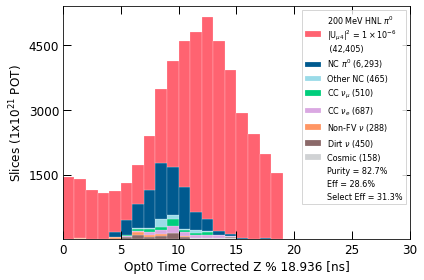

In [11]:
width = 18.936
this_label = str(m) + ' MeV HNL ${\pi}^{0}$' + '\n' + '|U$_{{\mu 4}}$|$^{{2}}$ = ' +str(sci_notation(plotU,0,0))

hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 30, xnbin = 30,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',
                    ifAddLegend = True, addLegend = this_label
                    )
plt.show()

<h1>Separate Into Signal and Background Sample </h1>

In [12]:
df_cos_nu = df_nu[df_nu['slc_true_event_type'] == 9]
df_cos_hnl = df_hnl[df_hnl['slc_true_event_type'] == 9]

df_nu = df_nu[df_nu['slc_true_event_type'] != 9]
df_hnl = df_hnl[df_hnl['slc_true_event_type'] != 9]

In [13]:
df_cos = pd.concat([df_cos, df_cos_nu, df_cos_hnl])

In [14]:
del df_cos_nu
del df_cos_hnl

<h3>Plot Individual Sample</h3>

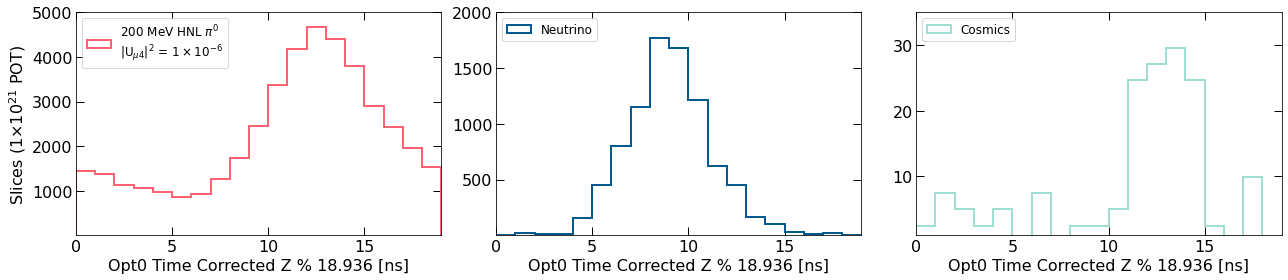

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,4))

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax

#-----------------------------------------------------------------#
pltdf = df_hnl['mod_t']
weights = df_hnl['scale_pot']

_, _, _ = ax1.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = hnl_col,
                            linestyle = "-",
                            linewidth = 2,
                            label = this_label
                        )
#-----------------------------------------------------------------#
pltdf = df_nu['mod_t']
weights = df_nu['scale_pot']

_, _, _ = ax2.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = nu_col,
                            linestyle = "-",
                            linewidth = 2,
                            label = "Neutrino"
                        )

#-----------------------------------------------------------------#
pltdf = df_cos['mod_t']
weights = df_cos['scale_pot']

_, _, _ = ax3.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = col_dict['PastelGreen'],
                            linestyle = "-",
                            linewidth = 2,
                            label = "Cosmics"
                        )
#-----------------------------------------------------------------#
ax1.legend(loc = 'upper left',fontsize = 12)
plot_tick(ax1, 16)
plot_title(ax1, "", 'Opt0 Time Corrected Z % 18.936 [ns]',  r"Slices (1$\times10^{21}$ POT)", 16)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(1, 5000)

#-----------------------------------------------------------------#
ax2.legend(loc = 'upper left',fontsize = 12)
plot_tick(ax2, 16)
plot_title(ax2, "", 'Opt0 Time Corrected Z % 18.936 [ns]',  "", 16)

ax2.set_xlim(xmin, xmax)
ax2.set_ylim(1, 2000)

#-----------------------------------------------------------------#
ax3.legend(loc = 'upper left',fontsize = 12)
plot_tick(ax3, 16)
plot_title(ax3, "", 'Opt0 Time Corrected Z % 18.936 [ns]',  "", 16)

ax3.set_xlim(xmin, xmax)
ax3.set_ylim(1, 35)
#-----------------------------------------------------------------#
fig.tight_layout()

plt.savefig(savePath+str("hnl_neutrino_overlay.png"), dpi=200)
    
plt.show()

<h1>HNL</h1>

<h3>Statistics</h3>


prescale: entries per bin
[ 587  556  455  427  392  349  373  508  699  989 1365 1691 1890 1784
 1535 1177  985  790  617]

 stat err
[24.22808288 23.57965225 21.33072901 20.66397832 19.79898987 18.68154169
 19.31320792 22.53885534 26.43860813 31.44837039 36.9459064  41.12177039
 43.47413024 42.23742416 39.17907605 34.3074336  31.38470965 28.10693865
 24.8394847 ]


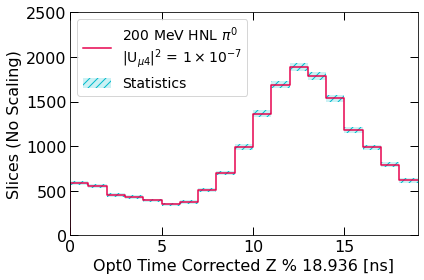

In [16]:
#bin it
hnl_cv, _ = np.histogram(np.array(df_hnl['mod_t']), bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin))

#No Scale
print("\nprescale: entries per bin")
print(hnl_cv)

#Make covariance matrix
hnl_stat_cov = np.diag(hnl_cv) #[some NxN covariance matrix e.g. np.diag(cv) for statistical]
hnl_stat_err = np.sqrt(np.diag(hnl_stat_cov))

print("\n stat err")
print(hnl_stat_err)

#save in dictionary
hnl_cv_plot = np.insert(hnl_cv, 0, 0)

bins_mid = np.convolve(bins, [0.5, 0.5], "valid")

hnl_dict['cv'] = hnl_cv
hnl_dict['cv_plot'] = hnl_cv_plot

hnl_dict['stat_cov'] = hnl_stat_cov
hnl_dict['stat_err'] = hnl_stat_err

#plot and save
plot_hatchy_hatch(hnl_dict, hnl_label, "hnl", "stat_err")

plt.savefig(savePath+str("hnl_statistics_error.png"), dpi=200)
    
plt.show()

<h3>Flux</h3>

slc_flux_weight_expskin Exposure Skin Weight


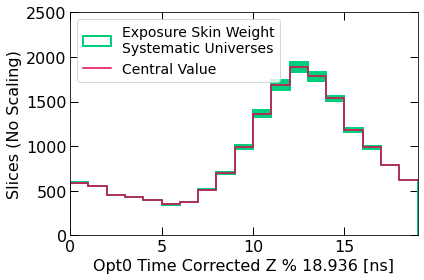

(19,)
(1000, 19)
slc_flux_weight_horncurrent Horn Current Weight


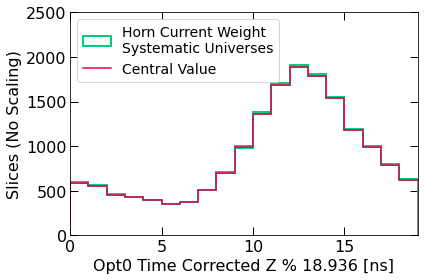

(19,)
(1000, 19)
slc_flux_weight_kminus Kaon Minus Weight


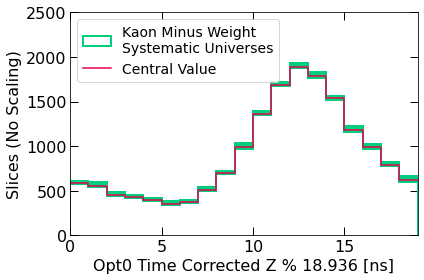

(19,)
(1000, 19)
slc_flux_weight_kplus Kaon Plus Weight


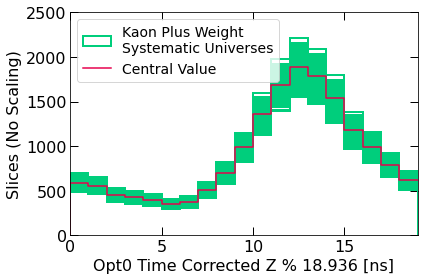

(19,)
(1000, 19)
slc_flux_weight_kzero Neutral Kaon Weight


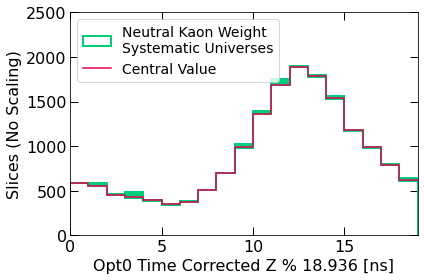

(19,)
(1000, 19)
slc_flux_weight_nucleoninexsec Nucleon Ineslastic Cross Section Weight


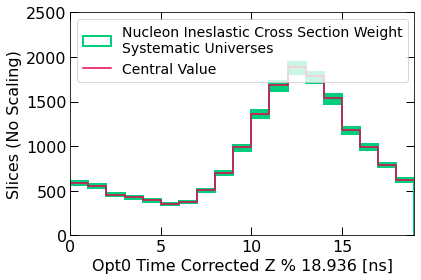

(19,)
(1000, 19)
slc_flux_weight_nucleonqexsec Nucleon Quasi-Elastic Cross Section Weight


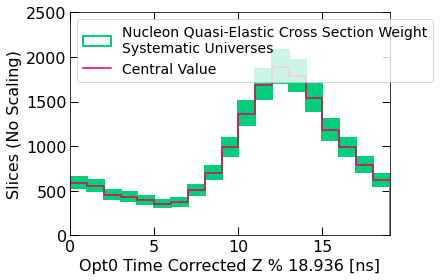

(19,)
(1000, 19)
slc_flux_weight_nucleontotxsec Nucleon Total Cross Section Weight


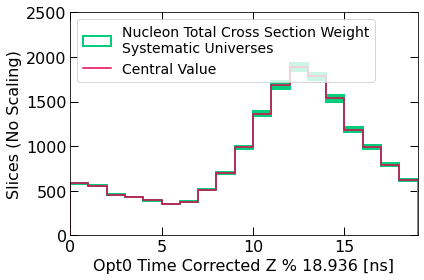

(19,)
(1000, 19)
slc_flux_weight_piminus Pion Minus Weight


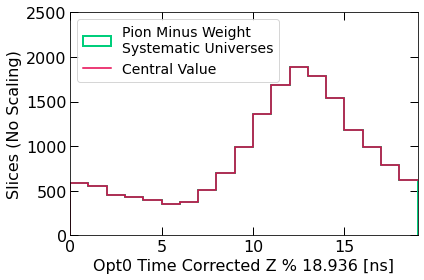

(19,)
(1000, 19)
slc_flux_weight_pioninexsex Pion Inelastic Cross Section Weight


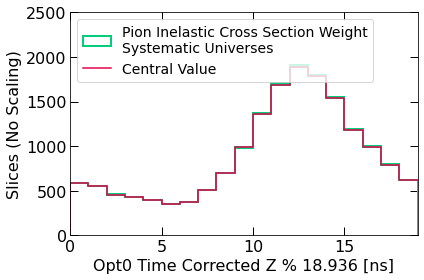

(19,)
(1000, 19)
slc_flux_weight_pionqexsec Pion Quasi-Elastic Cross Section Weight


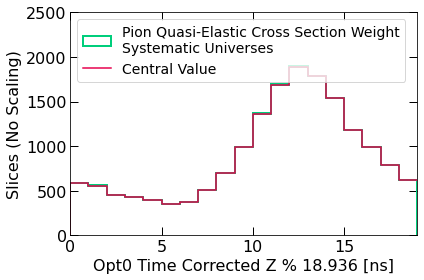

(19,)
(1000, 19)
slc_flux_weight_piontotxsec Pion Total Cross Section Weight


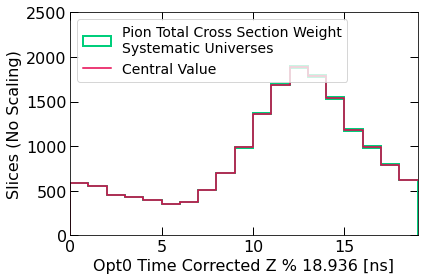

(19,)
(1000, 19)
slc_flux_weight_piplus Pion Plus Weight


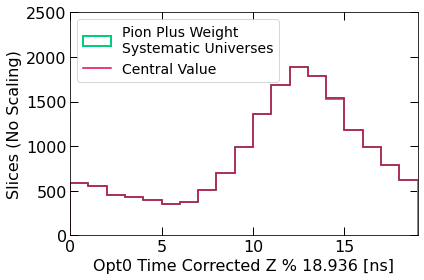

(19,)
(1000, 19)


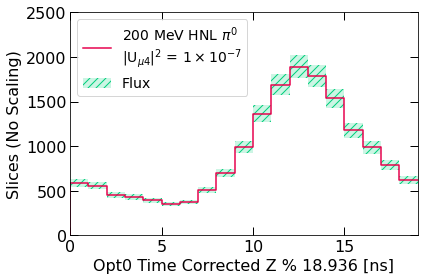

In [17]:
#Make covariance matrix per variable
hnl_flx_cov_array =loopy_loop_multisim_universe(flux_list, flux_name, 1000, df_hnl, hnl_dict, 'hnl', savePath)

#Add them together
hnl_flx_cov = new_19_by_19_cov()

for cov in hnl_flx_cov_array:
    hnl_flx_cov = hnl_flx_cov + cov
    
hnl_flx_err = np.sqrt(np.diag(hnl_flx_cov))

#save in dictionary
hnl_dict['flx_cov'] = hnl_flx_cov
hnl_dict['flx_err'] = hnl_flx_err

#plot it
plot_hatchy_hatch(hnl_dict, hnl_label, "hnl", "flx_err")

plt.savefig(savePath+str("hnl_flux_error.png"), dpi=200)
    
plt.show()

<h3>Combine Errors</h3>

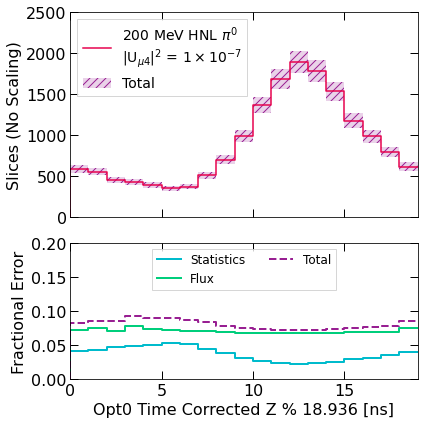

In [18]:
combine_error(hnl_dict, hnl_error_list)

#plot it
plot_combine_err(hnl_dict, "hnl", hnl_label, hnl_error_list)

plt.savefig(savePath+str("hnl_beam_bucket_combined_covariance.png"), dpi=200)
    
plt.show()

<h3>Scale To POT AND Umu Coupling</h3>

In [19]:
hnl_scale_factor = df_hnl['scale_pot'].unique()[0]
fitU = plotU
print(hnl_scale_factor)
print(fitU)

scale = 1/100
hnl_scale_factor = hnl_scale_factor * scale
fitU = getUfromScaleFactor(fitU, scale)
print(hnl_scale_factor)
print(fitU)

2.470705824914091
1e-06
0.02470705824914091
1e-07


In [20]:
scale_cov_matrix(hnl_dict, hnl_scale_factor, hnl_error_list)

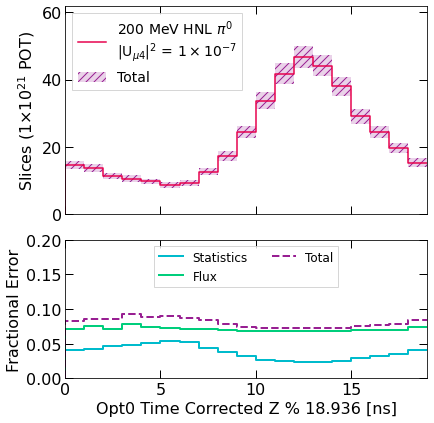

In [22]:
plot_combine_err(hnl_dict, "hnl", hnl_label, hnl_error_list
                  , ifScale = True , scaleYmax = hnl_scale_factor, suffix = '_scale')

plt.savefig(savePath+str("hnl_beam_bucket_combined_covariance_scaled.png"), dpi=200)
    
plt.show()

<h1>Separate Neutrinos sample</h1>

In [23]:
unique_pot = df_nu['scale_pot'].unique()
print(unique_pot)

df_nu_rockbox = df_nu[df_nu['scale_pot'] ==  max(unique_pot)]

df_nu_ncpi0 = df_nu[df_nu['scale_pot'] ==  min(unique_pot)]

print(len(df_nu))
print(len(df_nu_rockbox))
print(len(df_nu_ncpi0))

print(df_nu_rockbox['scale_pot'].unique())
print(df_nu_ncpi0['scale_pot'].unique())

[ 6.75967798 22.16498266]
1040
108
932
[22.16498266]
[6.75967798]


<h1>Rockbox Neutrino</h1>

<h3>Statistics</h3>


prescale: entries per bin
[ 0  1  0  0  2  4 11 12 21 25 11  9  7  3  2  0  0  0  0]

 stat err
[0.         1.         0.         0.         1.41421356 2.
 3.31662479 3.46410162 4.58257569 5.         3.31662479 3.
 2.64575131 1.73205081 1.41421356 0.         0.         0.
 0.        ]


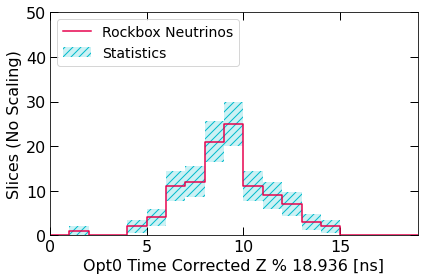

In [24]:
#bin it
rockbox_cv, _ = np.histogram(np.array(df_nu_rockbox['mod_t']), bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin))

#No Scale
print("\nprescale: entries per bin")
print(rockbox_cv)

#make covariance matrix
rockbox_stat_cov = np.diag(rockbox_cv) #[some NxN covariance matrix e.g. np.diag(cv) for statistical]
rockbox_stat_err = np.sqrt(np.diag(rockbox_stat_cov))

print("\n stat err")
print(rockbox_stat_err)

#save in dictionary
rockbox_cv_plot = np.insert(rockbox_cv, 0, 0)

rockbox_dict['cv'] = rockbox_cv
rockbox_dict['cv_plot'] = rockbox_cv_plot

rockbox_dict['stat_cov'] = rockbox_stat_cov
rockbox_dict['stat_err'] = rockbox_stat_err

#plot and save
plot_hatchy_hatch(rockbox_dict, rockbox_label, "rockbox", "stat_err")

plt.savefig(savePath+str("rockbox_stats_error.png"), dpi=200)
    
plt.show()

<h3>Flux</h3>

slc_flux_weight_expskin Exposure Skin Weight


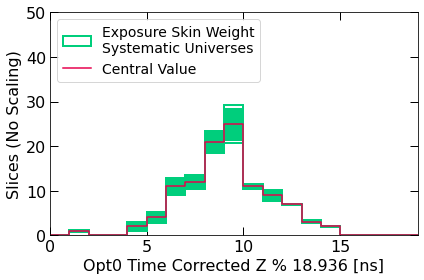

(19,)
(1000, 19)
slc_flux_weight_horncurrent Horn Current Weight


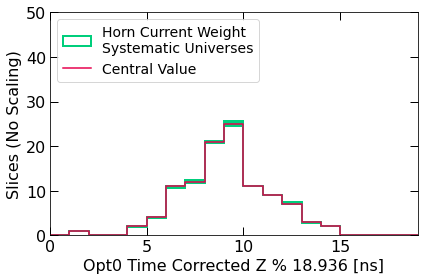

(19,)
(1000, 19)
slc_flux_weight_kminus Kaon Minus Weight


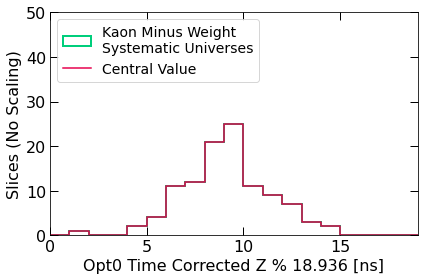

(19,)
(1000, 19)
slc_flux_weight_kplus Kaon Plus Weight


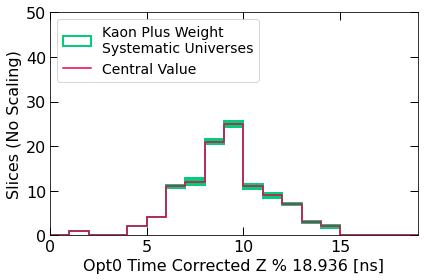

(19,)
(1000, 19)
slc_flux_weight_kzero Neutral Kaon Weight


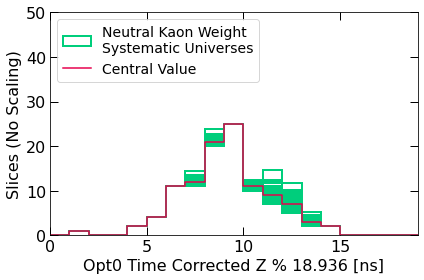

(19,)
(1000, 19)
slc_flux_weight_nucleoninexsec Nucleon Ineslastic Cross Section Weight


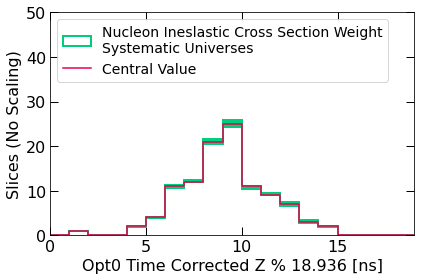

(19,)
(1000, 19)
slc_flux_weight_nucleonqexsec Nucleon Quasi-Elastic Cross Section Weight


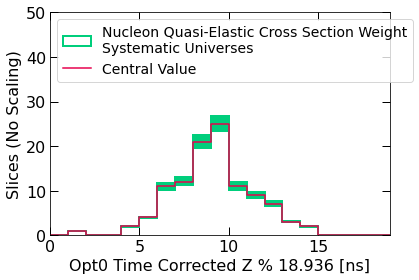

(19,)
(1000, 19)
slc_flux_weight_nucleontotxsec Nucleon Total Cross Section Weight


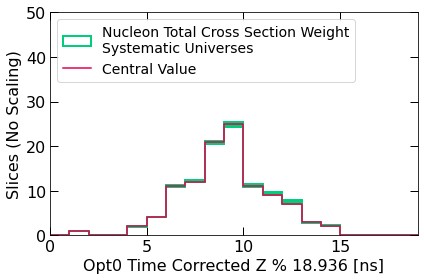

(19,)
(1000, 19)
slc_flux_weight_piminus Pion Minus Weight


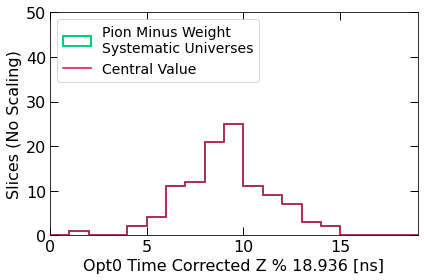

(19,)
(1000, 19)
slc_flux_weight_pioninexsex Pion Inelastic Cross Section Weight


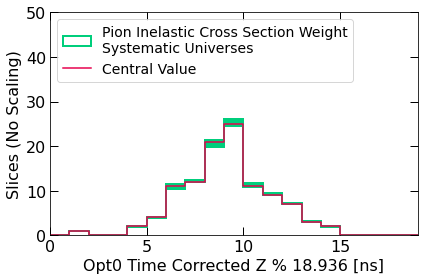

(19,)
(1000, 19)
slc_flux_weight_pionqexsec Pion Quasi-Elastic Cross Section Weight


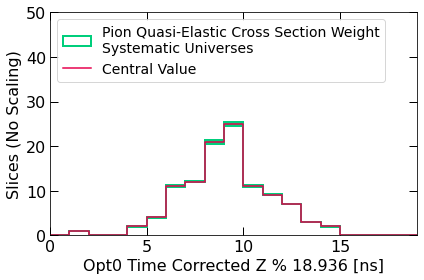

(19,)
(1000, 19)
slc_flux_weight_piontotxsec Pion Total Cross Section Weight


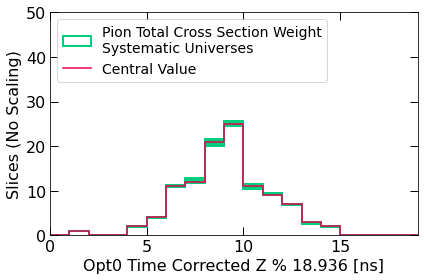

(19,)
(1000, 19)
slc_flux_weight_piplus Pion Plus Weight


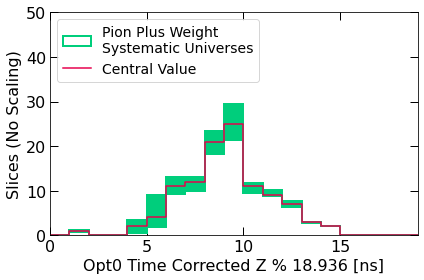

(19,)
(1000, 19)


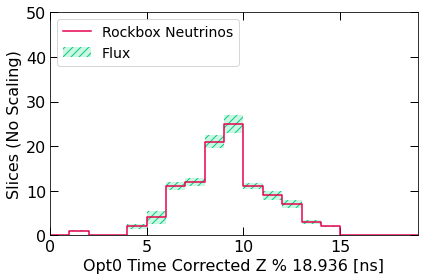

In [25]:
rockbox_flx_cov_array =loopy_loop_multisim_universe(flux_list, flux_name, 1000
                                                    , df_nu_rockbox, rockbox_dict, 'rockbox'
                                                    , savePath)

#Add them together
rockbox_flx_cov = new_19_by_19_cov()

for cov in rockbox_flx_cov_array:
    rockbox_flx_cov = rockbox_flx_cov + cov
    
rockbox_flx_err = np.sqrt(np.diag(rockbox_flx_cov))

rockbox_dict['flx_cov'] = rockbox_flx_cov
rockbox_dict['flx_err'] = rockbox_flx_err

#plot it

plot_hatchy_hatch(rockbox_dict, rockbox_label, "rockbox", "flx_err")

plt.savefig(savePath+str("rockbox_flux_error.png"), dpi=200)
    
plt.show()

<h3>Cross-Section: UniSim</h3>

In [26]:
for name in unisim_list:
    df_nu_rockbox[name] = df_nu_rockbox[name].apply(lambda row: check_unisim(row))

slc_xsec_unisim_DecayAngMEC
108
108


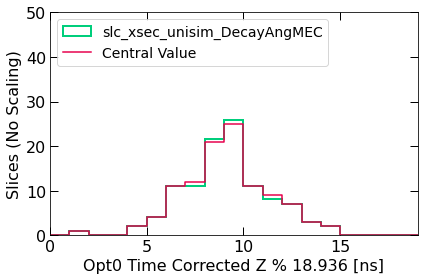

[0.         0.         0.         0.         0.         0.
 0.         0.9219799  0.56810951 0.75612259 0.         0.9519043
 0.         0.         0.         0.         0.         0.
 0.        ]
slc_xsec_unisim_ThetaDelta2NRad
108
108


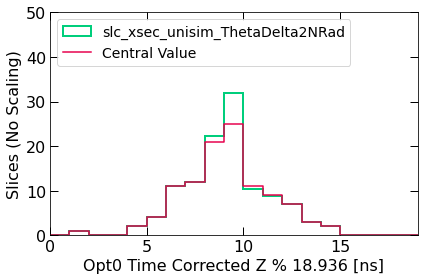

[0.         0.         0.         0.         0.         0.
 0.         0.         1.37913513 6.92598724 0.58097076 0.12391663
 0.         0.         0.         0.         0.         0.
 0.        ]
slc_xsec_unisim_Theta_Delta2Npi
108
108


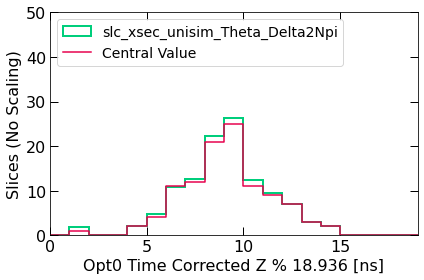

[0.         0.88428426 0.         0.         0.10104156 0.71256542
 0.2521019  0.60264206 1.17382812 1.33590698 1.3802948  0.51548767
 0.         0.12256622 0.         0.         0.         0.
 0.        ]
slc_xsec_unisim_VecFFCCQEshape
108
108


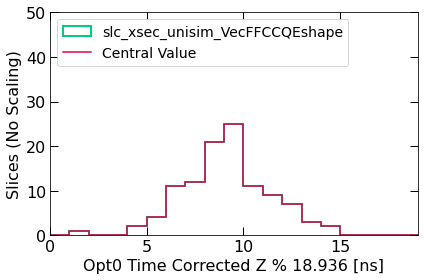

[0.         0.         0.         0.         0.         0.04267502
 0.         0.         0.03600311 0.05595779 0.04536438 0.01050568
 0.06417847 0.02583313 0.06623077 0.         0.         0.
 0.        ]


In [27]:
rockbox_unisim_cov_array = loopy_loop_unisim(df_nu_rockbox, rockbox_dict, "rockbox", savePath)

<h3>Cross-Section: Multi-Sigma</h3>

(array([  1.,   6.,  12.,  44.,  84., 115., 104.,  77.,  36.,  21.]),
 array([-3.26212321, -2.70267265, -2.14322209, -1.58377153, -1.02432097,
        -0.46487041,  0.09458015,  0.65403071,  1.21348127,  1.77293183,
         2.33238238]),
 <BarContainer object of 10 artists>)

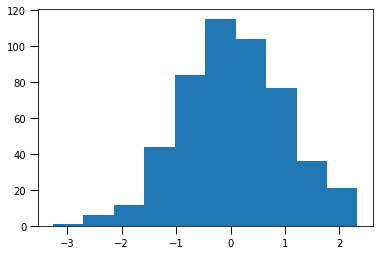

In [28]:
#make a random gaussian gun
mu, sigma = 0, 1 # mean and standard deviation
n_univ = len(df_nu['slc_xsec_multisim_total'][0])

random_arr = np.random.normal(mu, sigma, n_univ)
len_univ = np.arange(0, n_univ)
plt.hist(random_arr)

slc_xsec_multisigma_CoulombCCQE slc_xsec_multisigma_CoulombCCQE


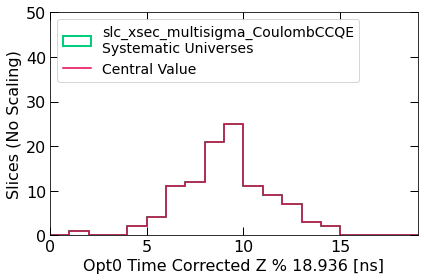

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvbarnCC1pi slc_xsec_multisigma_NonRESBGvbarnCC1pi


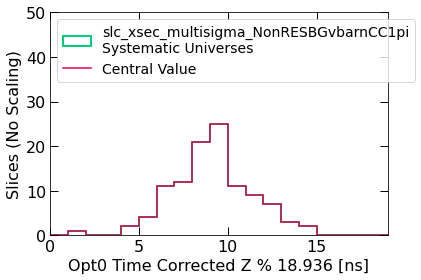

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvbarnCC2pi slc_xsec_multisigma_NonRESBGvbarnCC2pi


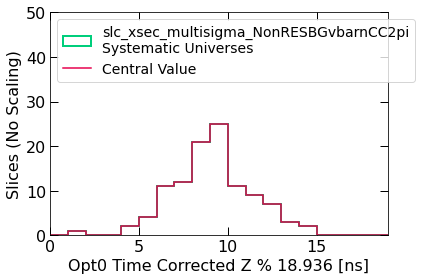

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvbarnNC1pi slc_xsec_multisigma_NonRESBGvbarnNC1pi


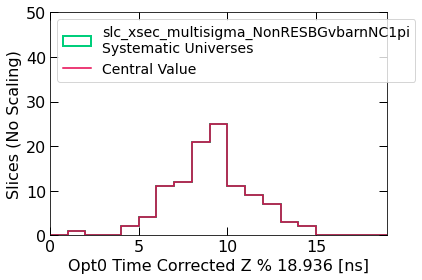

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvbarnNC2pi slc_xsec_multisigma_NonRESBGvbarnNC2pi


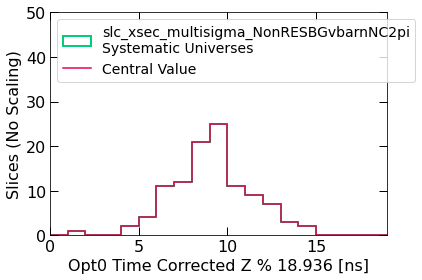

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvbarpCC1pi slc_xsec_multisigma_NonRESBGvbarpCC1pi


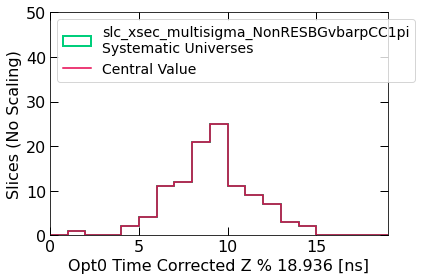

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvbarpCC2pi slc_xsec_multisigma_NonRESBGvbarpCC2pi


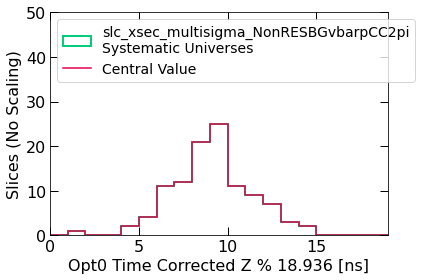

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvbarpNC1pi slc_xsec_multisigma_NonRESBGvbarpNC1pi


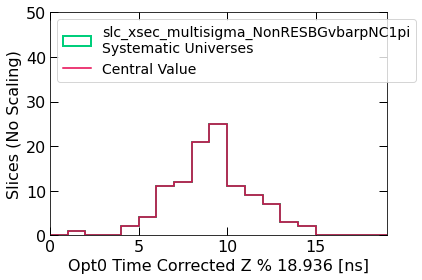

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvbarpNC2pi slc_xsec_multisigma_NonRESBGvbarpNC2pi


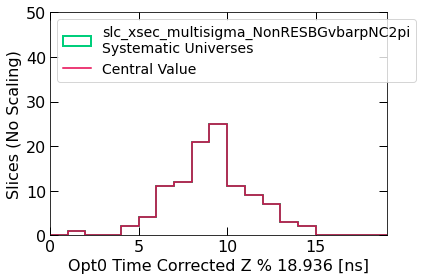

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvnCC1pi slc_xsec_multisigma_NonRESBGvnCC1pi


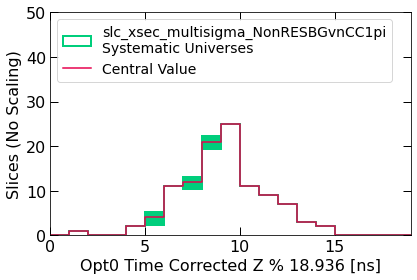

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvnCC2pi slc_xsec_multisigma_NonRESBGvnCC2pi


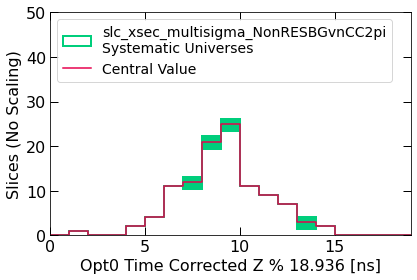

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvnNC1pi slc_xsec_multisigma_NonRESBGvnNC1pi


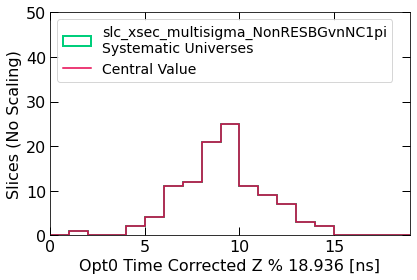

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvnNC2pi slc_xsec_multisigma_NonRESBGvnNC2pi


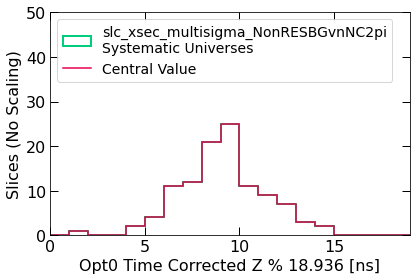

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvpCC1pi slc_xsec_multisigma_NonRESBGvpCC1pi


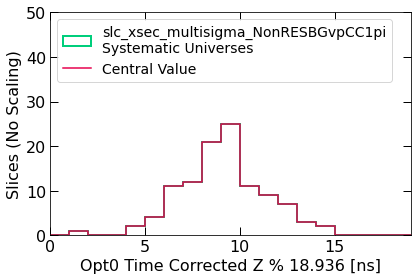

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvpCC2pi slc_xsec_multisigma_NonRESBGvpCC2pi


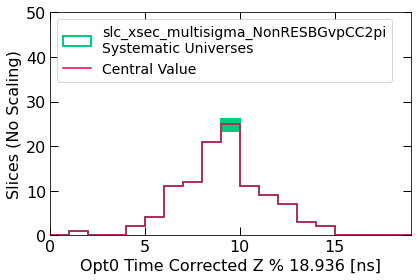

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvpNC1pi slc_xsec_multisigma_NonRESBGvpNC1pi


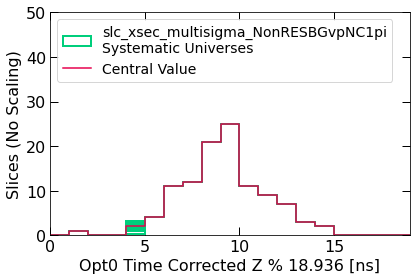

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvpNC2pi slc_xsec_multisigma_NonRESBGvpNC2pi


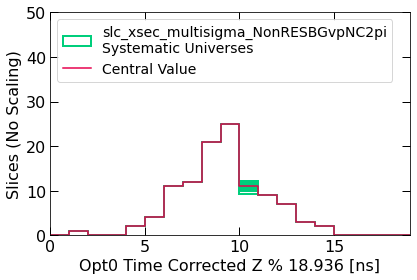

(19,)
(500, 19)
slc_xsec_multisigma_NormCCMEC slc_xsec_multisigma_NormCCMEC


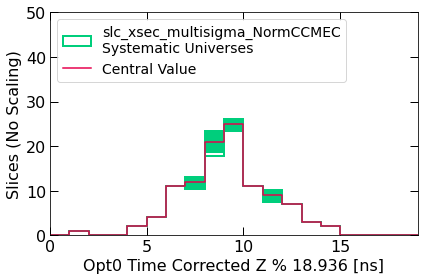

(19,)
(500, 19)
slc_xsec_multisigma_NormNCMEC slc_xsec_multisigma_NormNCMEC


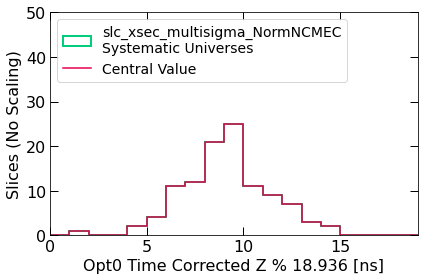

(19,)
(500, 19)
slc_xsec_multisigma_RDecBR1eta slc_xsec_multisigma_RDecBR1eta


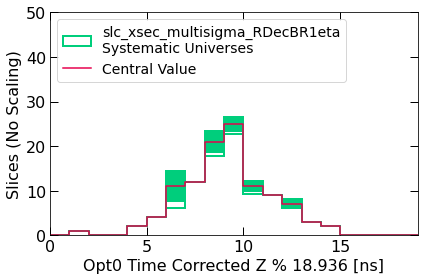

(19,)
(500, 19)
slc_xsec_multisigma_RDecBR1gamma slc_xsec_multisigma_RDecBR1gamma


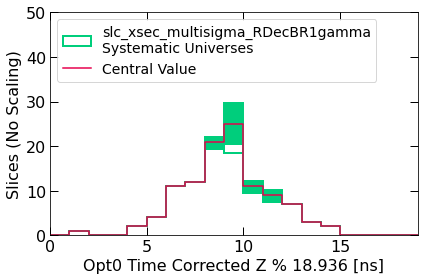

(19,)
(500, 19)
slc_xsec_multisigma_RPA_CCQE slc_xsec_multisigma_RPA_CCQE


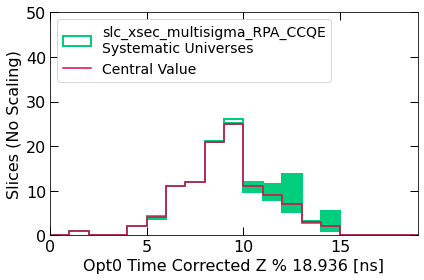

(19,)
(500, 19)
slc_xsec_multisigma_NormNCCOH slc_xsec_multisigma_NormNCCOH


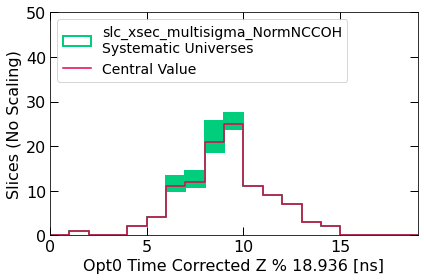

(19,)
(500, 19)
slc_xsec_multisigma_NormCCCOH slc_xsec_multisigma_NormCCCOH


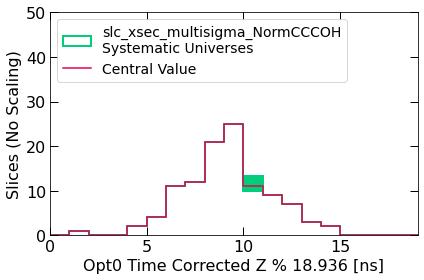

(19,)
(500, 19)


In [29]:
rockbox_multisigma_cov_arr = loopy_loop_multisigma(multisigma_list, multisigma_list, random_arr
                                                   , df_nu_rockbox, rockbox_dict, "rockbox"
                                                   , savePath
                                                  )

<h3>Cross-Section: Multi-Sim</h3>

slc_xsec_multisim_ZExpA slc_xsec_multisim_ZExpA


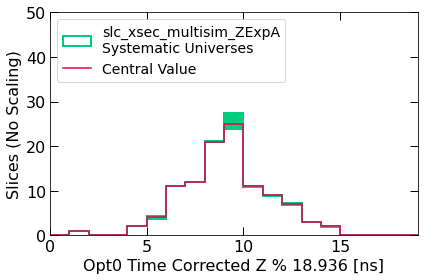

(19,)
(500, 19)
slc_xsec_multisim_NCEL slc_xsec_multisim_NCEL


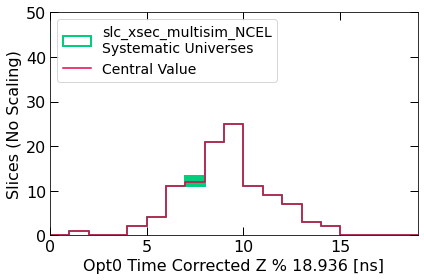

(19,)
(500, 19)
slc_xsec_multisim_CCRES slc_xsec_multisim_CCRES


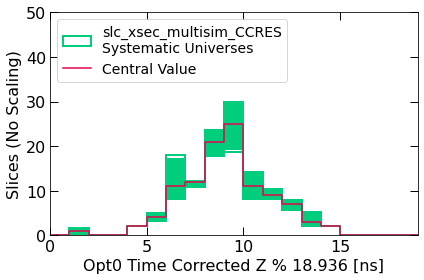

(19,)
(500, 19)
slc_xsec_multisim_NCRES slc_xsec_multisim_NCRES


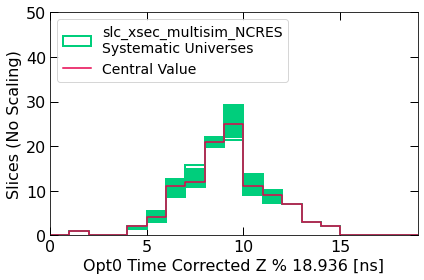

(19,)
(500, 19)
slc_xsec_multisim_DISBY slc_xsec_multisim_DISBY


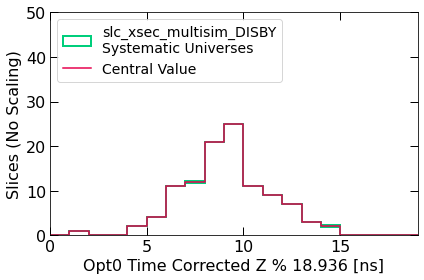

(19,)
(500, 19)
slc_xsec_multisim_FSI_pi slc_xsec_multisim_FSI_pi


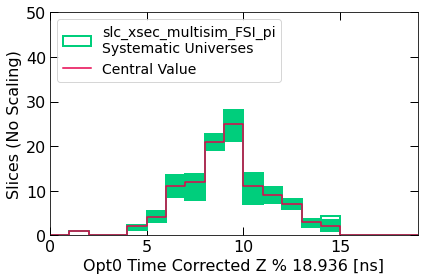

(19,)
(500, 19)
slc_xsec_multisim_FSI_N slc_xsec_multisim_FSI_N


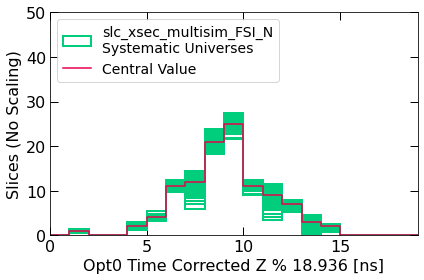

(19,)
(500, 19)


In [30]:
rockbox_multisim_cov_array =loopy_loop_multisim_universe(multisim_list, multisim_list, 500
                                                         , df_nu_rockbox, rockbox_dict, 'rockbox'
                                                         , savePath
                                                        )

<h3>Cross-Section: Combined</h3>

In [31]:
print(len(rockbox_unisim_cov_array))
print(len(rockbox_multisigma_cov_arr))
print(len(rockbox_multisim_cov_array))

rockbox_xsec_cov_array = rockbox_unisim_cov_array + rockbox_multisigma_cov_arr + rockbox_multisim_cov_array
print(len(rockbox_xsec_cov_array))

rockbox_xsec_cov = new_19_by_19_cov()

for cov in rockbox_xsec_cov_array:
    rockbox_xsec_cov = rockbox_xsec_cov + cov
    
rockbox_xsec_err = np.sqrt(np.diag(rockbox_xsec_cov))

rockbox_dict['xsec_cov'] = rockbox_xsec_cov
rockbox_dict['xsec_err'] = rockbox_xsec_err

4
24
7
35


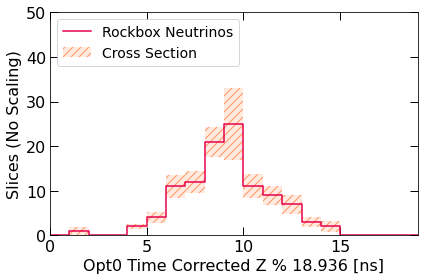

In [32]:
plot_hatchy_hatch(rockbox_dict, rockbox_label, "rockbox", "xsec_err")

plt.savefig(savePath+str("rockbox_xsec_error.png"), dpi=200)
    
plt.show()

<h3>Geant4 Re-Interactions</h3>

slc_geant4_multisim_reinteractions G4 Re-Interaction


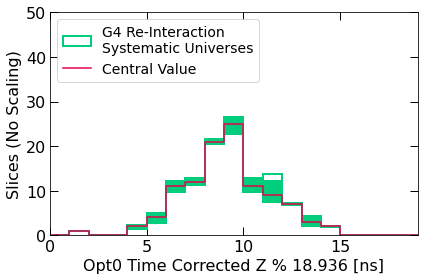

(19,)
(1000, 19)
[0.         0.01436632 0.         0.         0.14740382 0.35767846
 0.38612549 0.25293953 0.18097134 0.53260991 0.43607058 0.6984235
 0.05269787 0.33183503 0.02082161 0.         0.         0.
 0.        ]


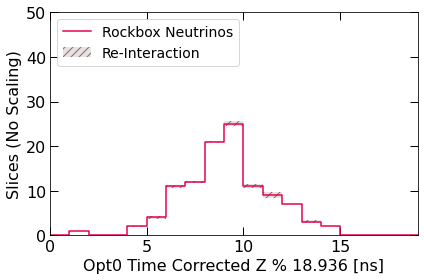

In [33]:
rockbox_g4_cov = loopy_loop_multisim_universe(g4_list, g4_name, 1000, df_nu_rockbox, rockbox_dict, "rockbox", savePath)
rockbox_g4_cov = rockbox_g4_cov[0]

rockbox_g4_err = np.sqrt(np.diag(rockbox_g4_cov))

#save it
rockbox_dict['g4_cov'] = rockbox_g4_cov
rockbox_dict['g4_err'] = rockbox_g4_err
print(rockbox_g4_err)

#plot it
plot_hatchy_hatch(rockbox_dict, rockbox_label, "rockbox", "g4_err")

plt.savefig(savePath+str("rockbox_g4_error.png"), dpi=200)
    
plt.show()

<h3> Combine Errors </h3>

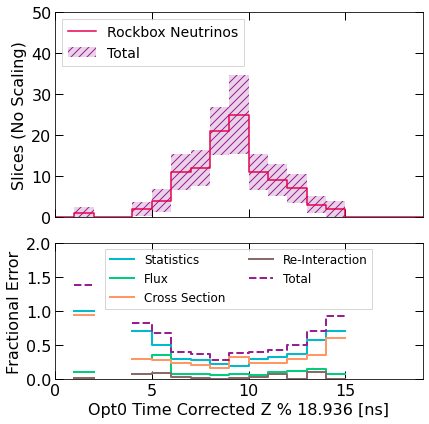

In [34]:
combine_error(rockbox_dict, nu_error_list)

#plot it
plot_combine_err(rockbox_dict, "rockbox", rockbox_label, nu_error_list)

plt.savefig(savePath+str("rockbox_beam_bucket_combined_covariance.png"), dpi=200)
    
plt.show()

<h3> Scale to POT </h3>

22.16498266245211


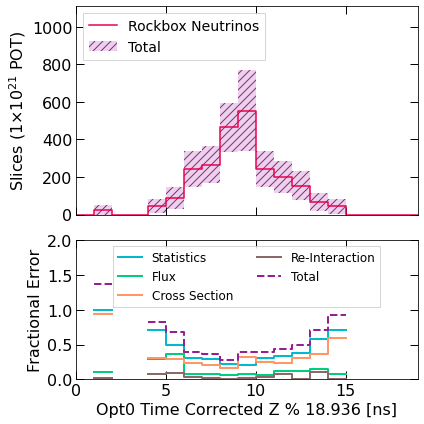

In [36]:
rockbox_scale_factor = df_nu_rockbox['scale_pot'].unique()[0]
print(rockbox_scale_factor)

scale_cov_matrix(rockbox_dict, rockbox_scale_factor, nu_error_list)

#plot it
plot_combine_err(rockbox_dict, "rockbox", rockbox_label, nu_error_list
                  , ifScale = True , scaleYmax = rockbox_scale_factor, suffix ='_scale')

plt.savefig(savePath+str("rockbox_beam_bucket_combined_covariance_scaked.png"), dpi=200)
    
plt.show()

<h1>NCPi0</h1>

<h3>Statistics</h3>


prescale: entries per bin
[  0   0   2   2  17  54  83 131 193 167 144  62  44  14   9   4   2   3
   1]

 stat err
[ 0.          0.          1.41421356  1.41421356  4.12310563  7.34846923
  9.11043358 11.44552314 13.89244399 12.92284798 12.          7.87400787
  6.63324958  3.74165739  3.          2.          1.41421356  1.73205081
  1.        ]


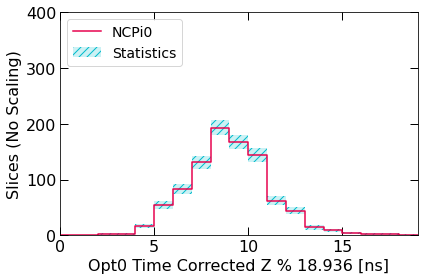

In [37]:
# bin it
ncpi0_cv, _ = np.histogram(np.array(df_nu_ncpi0['mod_t']), bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin))

#No Scale
print("\nprescale: entries per bin")
print(ncpi0_cv)

#This is the smart way
ncpi0_stat_cov = np.diag(ncpi0_cv) #[some NxN covariance matrix e.g. np.diag(cv) for statistical]
ncpi0_stat_err = np.sqrt(np.diag(ncpi0_stat_cov))

print("\n stat err")
print(ncpi0_stat_err)

#save in dictionary
ncpi0_cv_plot = np.insert(ncpi0_cv, 0, 0)

ncpi0_dict['cv'] = ncpi0_cv
ncpi0_dict['cv_plot'] = ncpi0_cv_plot

ncpi0_dict['stat_cov'] = ncpi0_stat_cov
ncpi0_dict['stat_err'] = ncpi0_stat_err

#plot it
plot_hatchy_hatch(ncpi0_dict, ncpi0_label, "ncpi0", "stat_err")

plt.savefig(savePath+str("ncpi0_stat_err.png"), dpi=200)

<h3>Flux</h3>

slc_flux_weight_expskin Exposure Skin Weight


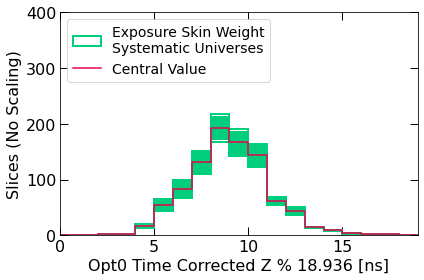

(19,)
(1000, 19)
slc_flux_weight_horncurrent Horn Current Weight


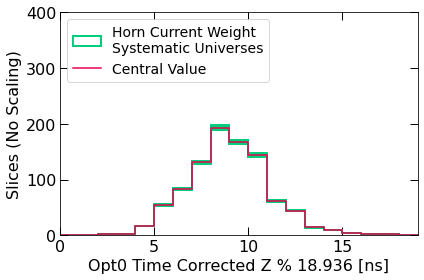

(19,)
(1000, 19)
slc_flux_weight_kminus Kaon Minus Weight


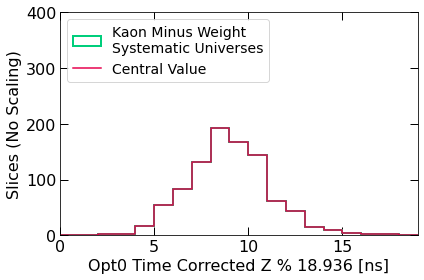

(19,)
(1000, 19)
slc_flux_weight_kplus Kaon Plus Weight


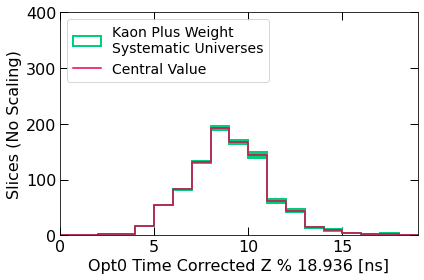

(19,)
(1000, 19)
slc_flux_weight_kzero Neutral Kaon Weight


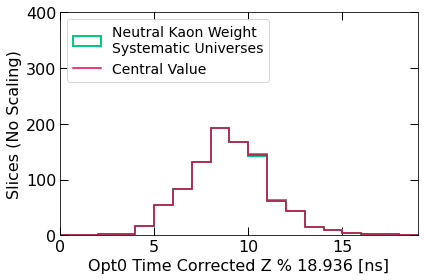

(19,)
(1000, 19)
slc_flux_weight_nucleoninexsec Nucleon Ineslastic Cross Section Weight


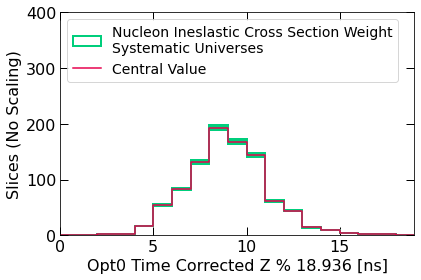

(19,)
(1000, 19)
slc_flux_weight_nucleonqexsec Nucleon Quasi-Elastic Cross Section Weight


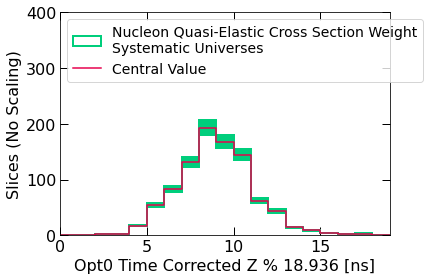

(19,)
(1000, 19)
slc_flux_weight_nucleontotxsec Nucleon Total Cross Section Weight


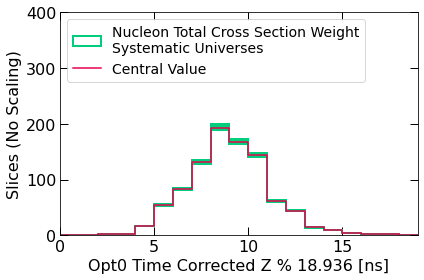

(19,)
(1000, 19)
slc_flux_weight_piminus Pion Minus Weight


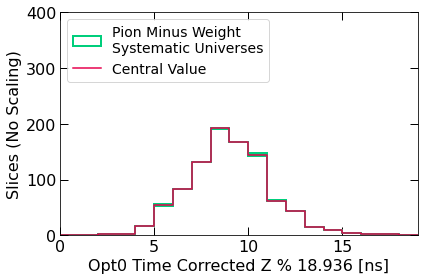

(19,)
(1000, 19)
slc_flux_weight_pioninexsex Pion Inelastic Cross Section Weight


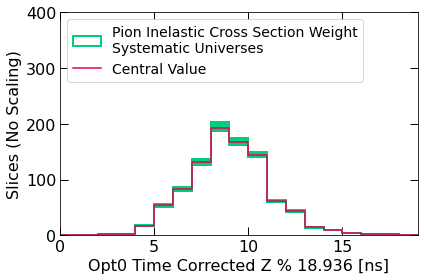

(19,)
(1000, 19)
slc_flux_weight_pionqexsec Pion Quasi-Elastic Cross Section Weight


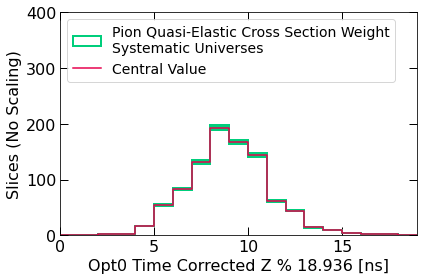

(19,)
(1000, 19)
slc_flux_weight_piontotxsec Pion Total Cross Section Weight


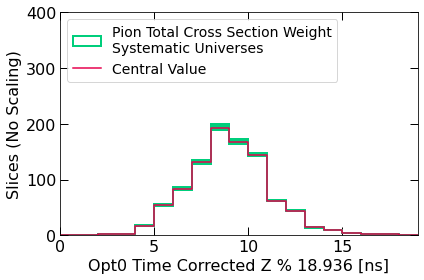

(19,)
(1000, 19)
slc_flux_weight_piplus Pion Plus Weight


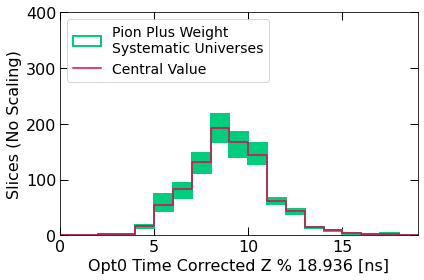

(19,)
(1000, 19)


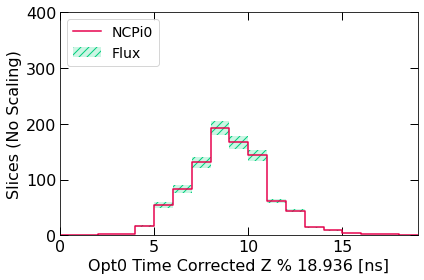

In [38]:
ncpi0_flx_cov_array =loopy_loop_multisim_universe(flux_list, flux_name, 1000, df_nu_ncpi0, ncpi0_dict, 'ncpi0', savePath)

#add cov matrix
ncpi0_flx_cov = new_19_by_19_cov()

for cov in ncpi0_flx_cov_array:
    ncpi0_flx_cov = ncpi0_flx_cov + cov
    
ncpi0_flx_err = np.sqrt(np.diag(ncpi0_flx_cov))

ncpi0_dict['flx_cov'] = ncpi0_flx_cov
ncpi0_dict['flx_err'] = ncpi0_flx_err

#plot it

plot_hatchy_hatch(ncpi0_dict, ncpi0_label, "ncpi0", "flx_err")

plt.savefig(savePath+str("ncpi0_flx_err.png"), dpi=200)

<h3>Cross-Section: UniSim</h3>

In [39]:
for name in unisim_list:
    
    df_nu_ncpi0[name] = df_nu_ncpi0[name].apply(lambda row: check_unisim(row))

slc_xsec_unisim_DecayAngMEC
932
932


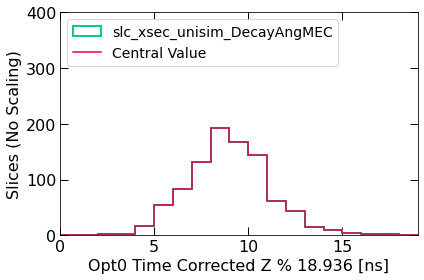

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
slc_xsec_unisim_ThetaDelta2NRad
932
932


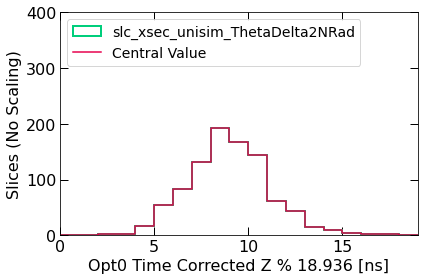

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
slc_xsec_unisim_Theta_Delta2Npi
932
932


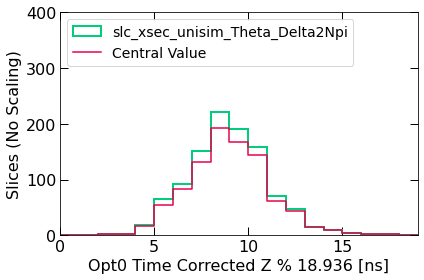

[ 0.          0.          0.6424346   0.          1.76464653 10.99487305
  8.52884674 19.78492737 28.46127319 22.86950684 15.31921387  9.3961792
  2.91143799  0.55810547  1.08203125  0.64453125  0.          0.
  0.        ]
slc_xsec_unisim_VecFFCCQEshape
932
932


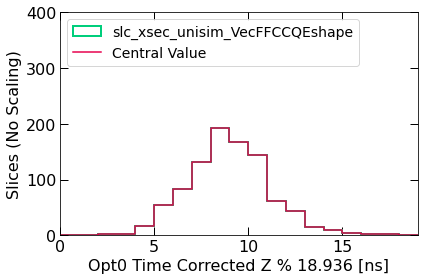

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [40]:
ncpi0_unisim_cov_array = loopy_loop_unisim(df_nu_ncpi0, ncpi0_dict, "ncpi0", savePath)

<h3>Cross-Section: Multi-Sigma</h3>

slc_xsec_multisigma_CoulombCCQE slc_xsec_multisigma_CoulombCCQE


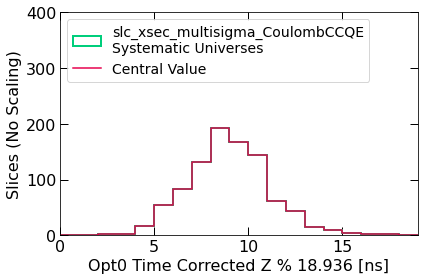

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvbarnCC1pi slc_xsec_multisigma_NonRESBGvbarnCC1pi


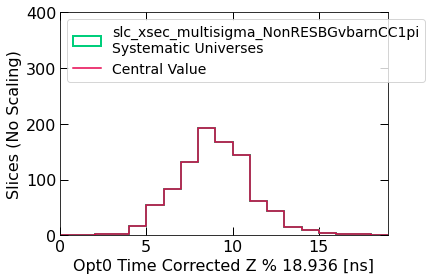

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvbarnCC2pi slc_xsec_multisigma_NonRESBGvbarnCC2pi


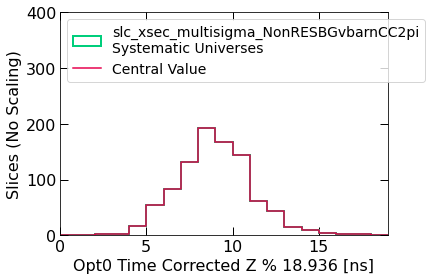

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvbarnNC1pi slc_xsec_multisigma_NonRESBGvbarnNC1pi


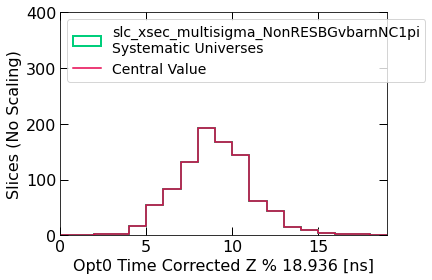

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvbarnNC2pi slc_xsec_multisigma_NonRESBGvbarnNC2pi


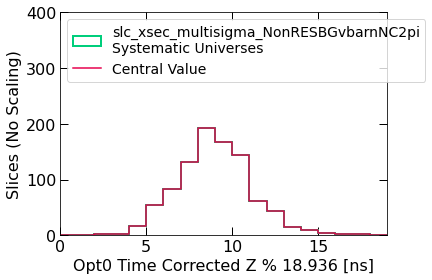

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvbarpCC1pi slc_xsec_multisigma_NonRESBGvbarpCC1pi


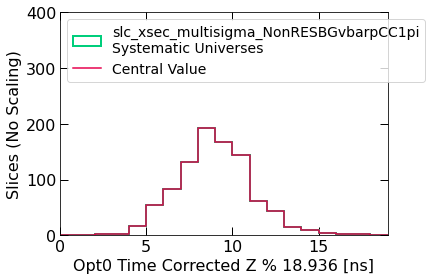

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvbarpCC2pi slc_xsec_multisigma_NonRESBGvbarpCC2pi


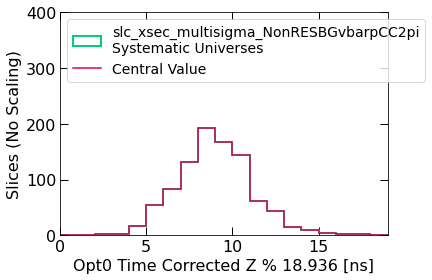

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvbarpNC1pi slc_xsec_multisigma_NonRESBGvbarpNC1pi


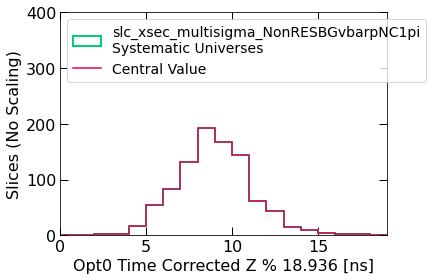

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvbarpNC2pi slc_xsec_multisigma_NonRESBGvbarpNC2pi


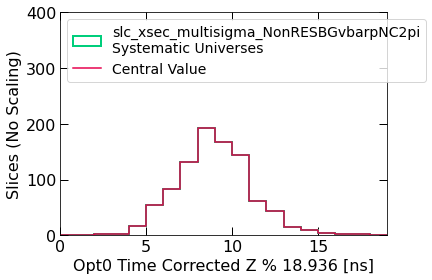

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvnCC1pi slc_xsec_multisigma_NonRESBGvnCC1pi


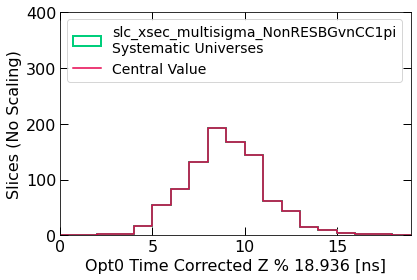

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvnCC2pi slc_xsec_multisigma_NonRESBGvnCC2pi


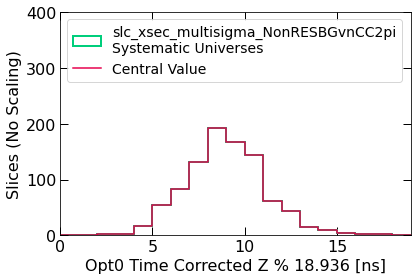

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvnNC1pi slc_xsec_multisigma_NonRESBGvnNC1pi


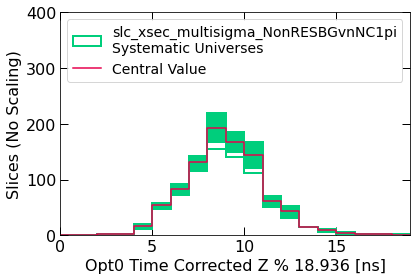

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvnNC2pi slc_xsec_multisigma_NonRESBGvnNC2pi


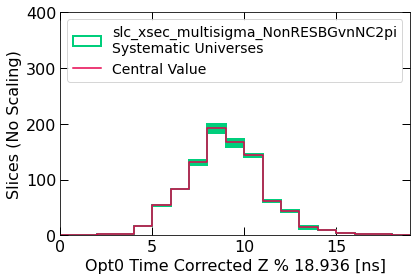

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvpCC1pi slc_xsec_multisigma_NonRESBGvpCC1pi


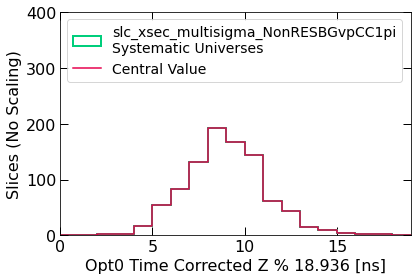

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvpCC2pi slc_xsec_multisigma_NonRESBGvpCC2pi


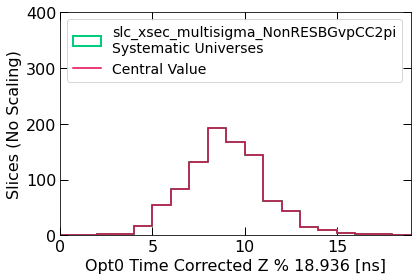

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvpNC1pi slc_xsec_multisigma_NonRESBGvpNC1pi


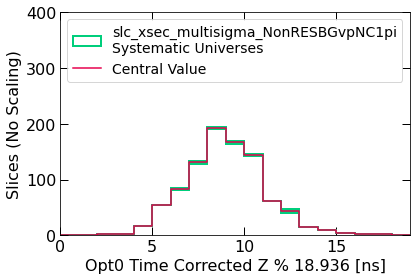

(19,)
(500, 19)
slc_xsec_multisigma_NonRESBGvpNC2pi slc_xsec_multisigma_NonRESBGvpNC2pi


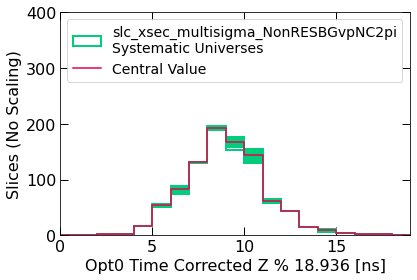

(19,)
(500, 19)
slc_xsec_multisigma_NormCCMEC slc_xsec_multisigma_NormCCMEC


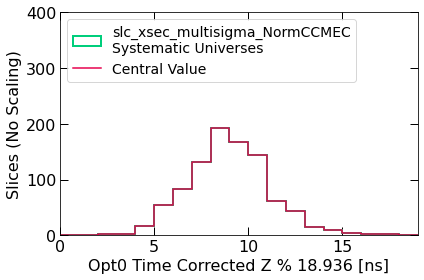

(19,)
(500, 19)
slc_xsec_multisigma_NormNCMEC slc_xsec_multisigma_NormNCMEC


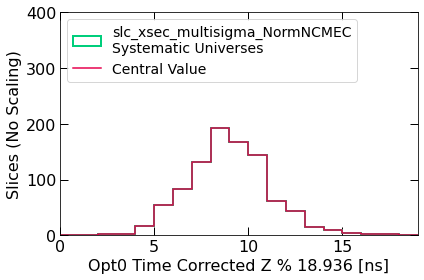

(19,)
(500, 19)
slc_xsec_multisigma_RDecBR1eta slc_xsec_multisigma_RDecBR1eta


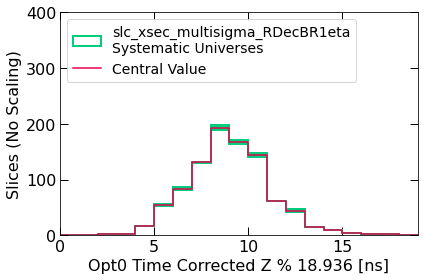

(19,)
(500, 19)
slc_xsec_multisigma_RDecBR1gamma slc_xsec_multisigma_RDecBR1gamma


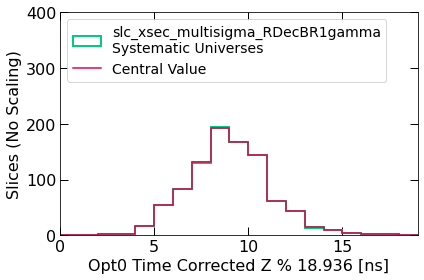

(19,)
(500, 19)
slc_xsec_multisigma_RPA_CCQE slc_xsec_multisigma_RPA_CCQE


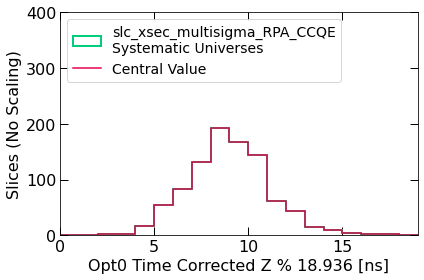

(19,)
(500, 19)
slc_xsec_multisigma_NormNCCOH slc_xsec_multisigma_NormNCCOH


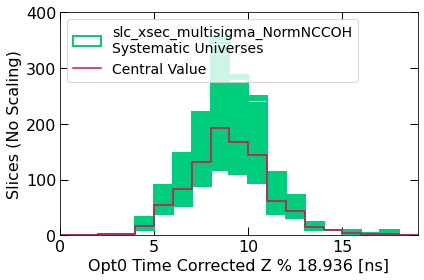

(19,)
(500, 19)
slc_xsec_multisigma_NormCCCOH slc_xsec_multisigma_NormCCCOH


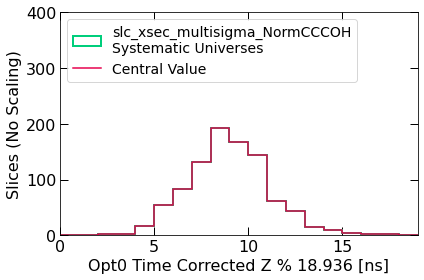

(19,)
(500, 19)


In [41]:
ncpi0_multisigma_cov_arr = loopy_loop_multisigma(multisigma_list, multisigma_list, random_arr
                                                 , df_nu_ncpi0, ncpi0_dict, "ncpi0"
                                                 , savePath
                                                )

<h3>Cross-Section: Multi-Sim</h3>

slc_xsec_multisim_ZExpA slc_xsec_multisim_ZExpA


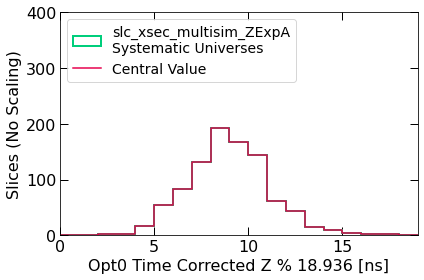

(19,)
(500, 19)
slc_xsec_multisim_NCEL slc_xsec_multisim_NCEL


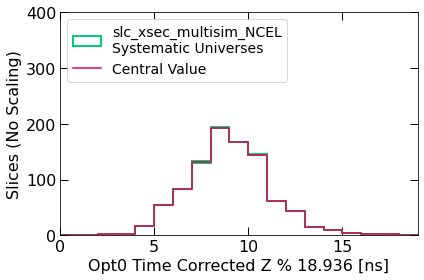

(19,)
(500, 19)
slc_xsec_multisim_CCRES slc_xsec_multisim_CCRES


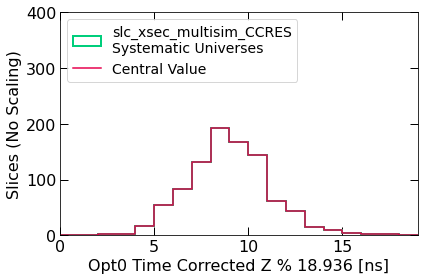

(19,)
(500, 19)
slc_xsec_multisim_NCRES slc_xsec_multisim_NCRES


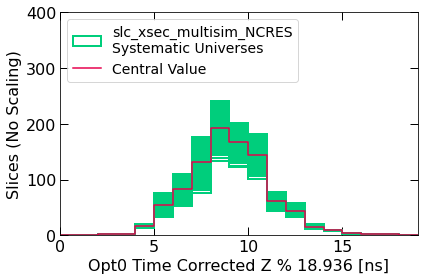

(19,)
(500, 19)
slc_xsec_multisim_DISBY slc_xsec_multisim_DISBY


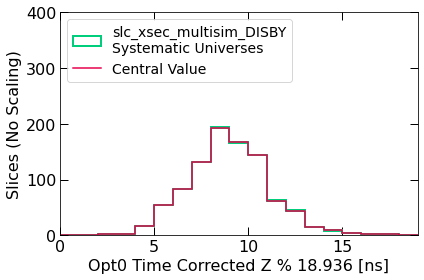

(19,)
(500, 19)
slc_xsec_multisim_FSI_pi slc_xsec_multisim_FSI_pi


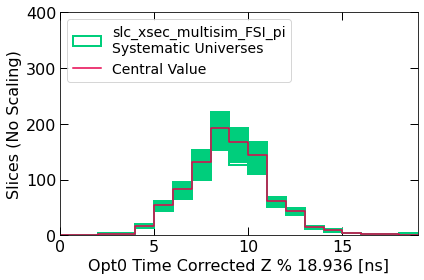

(19,)
(500, 19)
slc_xsec_multisim_FSI_N slc_xsec_multisim_FSI_N


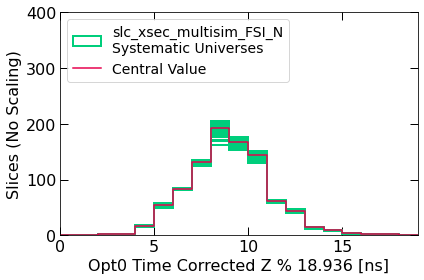

(19,)
(500, 19)


In [42]:
ncpi0_multisim_cov_array =loopy_loop_multisim_universe(multisim_list, multisim_list, 500
                                                       , df_nu_ncpi0, ncpi0_dict, 'ncpi0'
                                                       , savePath
                                                      )

<h3>Cross-Section: Combined</h3>

4
24
7
35
[ 0.          0.          1.00279449  0.8003973   6.51909942 18.60042397
 26.95207854 42.86570396 69.50065957 52.58215959 45.64711033 22.11928182
 12.45688182  4.0513771   1.96634854  1.90260395  0.96433306  2.5160999
  0.98003754]


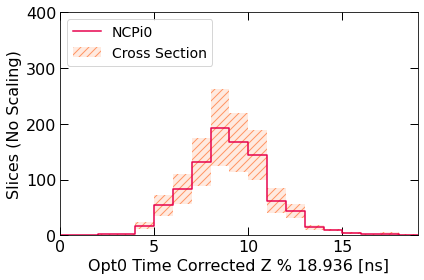

In [43]:
print(len(ncpi0_unisim_cov_array))
print(len(ncpi0_multisigma_cov_arr))
print(len(ncpi0_multisim_cov_array))

ncpi0_xsec_cov_array = ncpi0_unisim_cov_array  + ncpi0_multisigma_cov_arr + ncpi0_multisim_cov_array
print(len(ncpi0_xsec_cov_array))

ncpi0_xsec_cov = new_19_by_19_cov()

for cov in ncpi0_xsec_cov_array:
    ncpi0_xsec_cov = ncpi0_xsec_cov + cov
    
ncpi0_xsec_err = np.sqrt(np.diag(ncpi0_xsec_cov))

ncpi0_dict['xsec_cov'] = ncpi0_xsec_cov
ncpi0_dict['xsec_err'] = ncpi0_xsec_err

print(ncpi0_xsec_err)

#plot it
plot_hatchy_hatch(ncpi0_dict, ncpi0_label, "ncpi0", "xsec_err")

plt.savefig(savePath+str("ncpi0_xsec_err.png"), dpi=200)

<h3>Geant4 Re-Interactions</h3>

slc_geant4_multisim_reinteractions G4 Re-Interaction


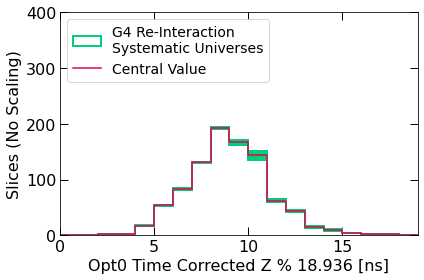

(19,)
(1000, 19)
[0.00000000e+00 0.00000000e+00 7.34260767e-05 1.87275952e-01
 2.33683115e-01 3.54937286e-01 6.84929306e-01 3.28817726e-01
 5.51989575e-01 1.40360997e+00 2.05135579e+00 1.02967764e+00
 6.58819962e-01 3.71983626e-01 5.29088689e-01 3.89852961e-02
 1.25842777e-01 0.00000000e+00 1.11222920e-01]


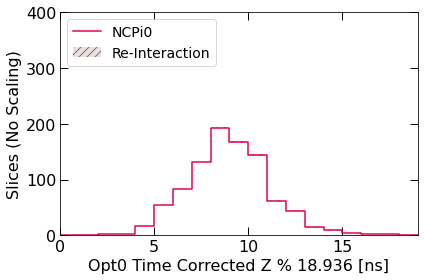

In [44]:
ncpi0_g4_cov = loopy_loop_multisim_universe(g4_list, g4_name, 1000, df_nu_ncpi0, ncpi0_dict, "ncpi0", savePath)
ncpi0_g4_cov = ncpi0_g4_cov[0]

ncpi0_g4_err = np.sqrt(np.diag(ncpi0_g4_cov))

ncpi0_dict['g4_cov'] = ncpi0_g4_cov
ncpi0_dict['g4_err'] = ncpi0_g4_err
print(ncpi0_g4_err)

#plot it
plot_hatchy_hatch(ncpi0_dict, ncpi0_label, "ncpi0", "g4_err")

plt.savefig(savePath+str("ncpi0_g4_error.png"), dpi=200)
    
plt.show()

<h3>Combine Errors</h3>

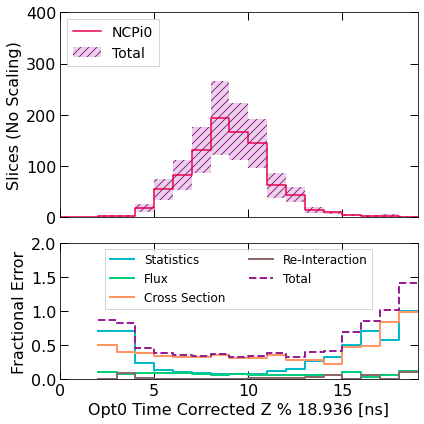

In [45]:
combine_error(ncpi0_dict, nu_error_list)

#plot it
plot_combine_err(ncpi0_dict, "ncpi0", ncpi0_label, nu_error_list)

plt.savefig(savePath+str("ncpi0_beam_bucket_combined_covariance.png"), dpi=200)
    
plt.show()

<h3>Scale to POT </h3>

6.759677976089504


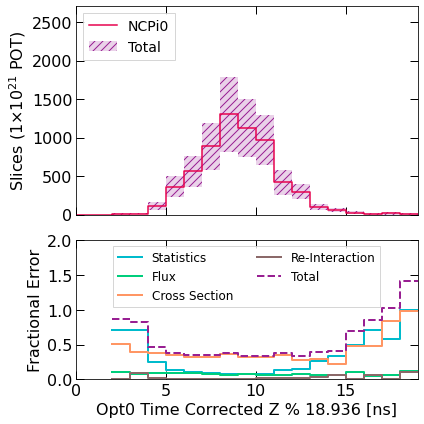

In [46]:
ncpi0_scale_factor = df_nu_ncpi0['scale_pot'].unique()[0]
print(ncpi0_scale_factor)

scale_cov_matrix(ncpi0_dict, ncpi0_scale_factor, nu_error_list)

#plot it
plot_combine_err(ncpi0_dict, "ncpi0", ncpi0_label, nu_error_list
                 , ifScale = True, scaleYmax = ncpi0_scale_factor, suffix ='_scale')

plt.savefig(savePath+str("ncpi0_beam_bucket_combined_covariance_scaked.png"), dpi=200)
    
plt.show()

<h1>Fuse Neutrino Background Into One Please</h1>

In [47]:
nu_dict = {}
nu_dict['cv_scale'] = rockbox_dict['cv_scale'] + ncpi0_dict['cv_scale']
nu_dict['cv_plot_scale'] = rockbox_dict['cv_plot_scale'] + ncpi0_dict['cv_plot_scale']

In [48]:
fill_nan_plz(rockbox_dict)
fill_nan_plz(ncpi0_dict)

In [49]:
nu_dict['combined_cov_scale'] = new_19_by_19_cov()

for err in nu_error_list:
    print(err)
    nu_dict[err+'_cov_scale'] = rockbox_dict[err+'_cov_scale'] + ncpi0_dict[err+'_cov_scale']
    nu_dict['combined_cov_scale'] = nu_dict['combined_cov_scale'] + nu_dict[err+'_cov_scale']
    
    nu_dict[err+'_err_scale'] = np.sqrt(np.diag(nu_dict[err+'_cov_scale']))
    
    nu_dict[err+'_cov_frac_scale'] = nu_dict[err+'_cov_scale'] / np.outer(nu_dict['cv_scale'], nu_dict['cv_scale'])
    nu_dict[err+'_frac_err_scale'] = np.sqrt(np.diag(nu_dict[err+'_cov_frac_scale']))
    
nu_dict['combined_err_scale'] = np.sqrt(np.diag( nu_dict['combined_cov_scale']))
    
nu_dict['combined_cov_frac_scale'] = nu_dict['combined_cov_scale'] / np.outer(nu_dict['cv_scale'], nu_dict['cv_scale'])
nu_dict['combined_frac_err_scale'] = np.sqrt(np.diag(nu_dict['combined_cov_frac_scale']))


stat
flx
xsec
g4


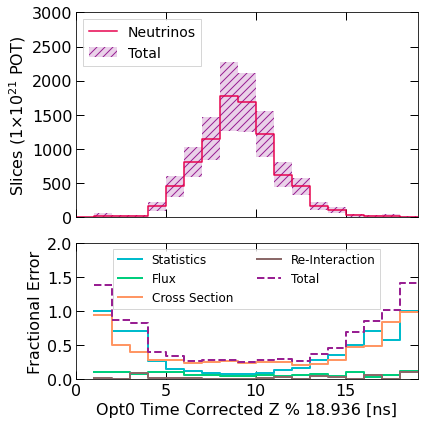

In [50]:
plot_combine_err(nu_dict, "nu", "Neutrinos", nu_error_list
                  , ifScale = True, suffix = '_scale')

plt.savefig(savePath+str("combined_neutrino_beam_bucket_combined_covariance_scaled.png"), dpi=200)
    
plt.show()

<h1> Cosmics </h1>

<h3>Separate Into Each Sample</h3>

In [51]:
unique_cos_pot = df_cos['scale_pot'].unique()
print(unique_cos_pot)

[22.16498266  2.47070582]


In [52]:
df_cos_rockbox = df_cos[df_cos['scale_pot'] == max(unique_cos_pot)]
df_cos_hnl = df_cos[df_cos['scale_pot'] == min(unique_cos_pot)]

cos_rockbox_dict = {}
cos_hnl_dict = {}

<h3>Rockbox Cosmics</h3>


prescale: entries per bin
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0]

 stat err
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]


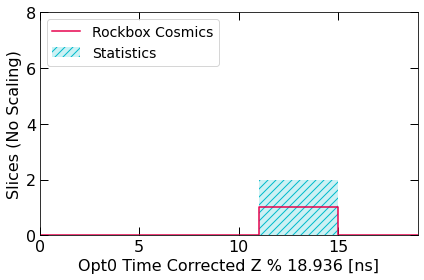

In [53]:
# bin it
cos_rockbox_cv, _ = np.histogram(np.array(df_cos_rockbox['mod_t']), bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin))

#No Scale
print("\nprescale: entries per bin")
print(cos_rockbox_cv)

#This is the smart way
cos_rockbox_stat_cov = np.diag(cos_rockbox_cv) #[some NxN covariance matrix e.g. np.diag(cv) for statistical]
cos_rockbox_stat_err = np.sqrt(np.diag(cos_rockbox_stat_cov))

print("\n stat err")
print(cos_rockbox_stat_err)

#save in dictionary
cos_rockbox_cv_plot = np.insert(cos_rockbox_cv, 0, 0)

cos_rockbox_dict['cv'] = cos_rockbox_cv
cos_rockbox_dict['cv_plot'] = cos_rockbox_cv_plot

cos_rockbox_dict['stat_cov'] = cos_rockbox_stat_cov
cos_rockbox_dict['stat_err'] = cos_rockbox_stat_err

#plot it
plot_hatchy_hatch(cos_rockbox_dict, "Rockbox Cosmics", "cos", "stat_err")

plt.savefig(savePath+str("cosmic_rockbox_stat_err.png"), dpi=200)

<h3>HNL Cosmics</h3>


prescale: entries per bin
[1 3 2 1 2 0 3 0 1 1 2 1 2 3 1 1 0 4 0]

 stat err
[1.         1.73205081 1.41421356 1.         1.41421356 0.
 1.73205081 0.         1.         1.         1.41421356 1.
 1.41421356 1.73205081 1.         1.         0.         2.
 0.        ]


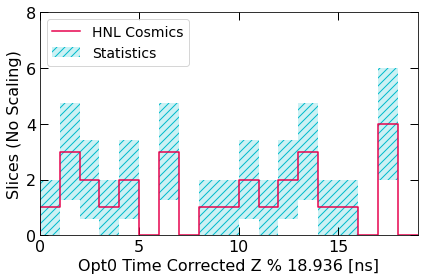

In [54]:
# bin it
cos_hnl_cv, _ = np.histogram(np.array(df_cos_hnl['mod_t']), bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin))

#No Scale
print("\nprescale: entries per bin")
print(cos_hnl_cv)

#This is the smart way
cos_hnl_stat_cov = np.diag(cos_hnl_cv) #[some NxN covariance matrix e.g. np.diag(cv) for statistical]
cos_hnl_stat_err = np.sqrt(np.diag(cos_hnl_stat_cov))

print("\n stat err")
print(cos_hnl_stat_err)

#save in dictionary
cos_hnl_cv_plot = np.insert(cos_hnl_cv, 0, 0)

cos_hnl_dict['cv'] = cos_hnl_cv
cos_hnl_dict['cv_plot'] = cos_hnl_cv_plot

cos_hnl_dict['stat_cov'] = cos_hnl_stat_cov
cos_hnl_dict['stat_err'] = cos_hnl_stat_err

#plot it
plot_hatchy_hatch(cos_hnl_dict, "HNL Cosmics", "cos", "stat_err")

plt.savefig(savePath+str("cosmic_hnl_stat_err.png"), dpi=200)

<h3>Scale and Combine Cosmics </h3>

In [55]:
combine_error(cos_rockbox_dict, cos_error_list)

combine_error(cos_hnl_dict, cos_error_list)

In [56]:
scale_cov_matrix(cos_rockbox_dict, rockbox_scale_factor, cos_error_list)

scale_cov_matrix(cos_hnl_dict, hnl_scale_factor, cos_error_list)

In [57]:
cos_rockbox_dict['cv_scale']

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 22.16498266, 22.16498266, 22.16498266, 22.16498266,
        0.        ,  0.        ,  0.        ,  0.        ])

In [58]:
fill_nan_plz(cos_rockbox_dict)
fill_nan_plz(cos_hnl_dict)

In [59]:
cos_dict = {}
cos_dict['cv_scale'] = cos_rockbox_dict['cv_scale'] + cos_hnl_dict['cv_scale']
cos_dict['cv_plot_scale'] = cos_rockbox_dict['cv_plot_scale'] + cos_hnl_dict['cv_plot_scale']

cos_dict['stat_cov_scale'] = cos_rockbox_dict['stat_cov_scale'] + cos_hnl_dict['stat_cov_scale']
cos_dict['stat_err_scale'] = np.sqrt(np.diag(cos_dict['stat_cov_scale']))

cos_dict['stat_cov_frac_scale'] = cos_dict['stat_cov_scale'] / np.outer(cos_dict['cv_scale'], cos_dict['cv_scale'])
cos_dict['stat_frac_err_scale'] = np.sqrt(np.diag(cos_dict['stat_cov_frac_scale']))

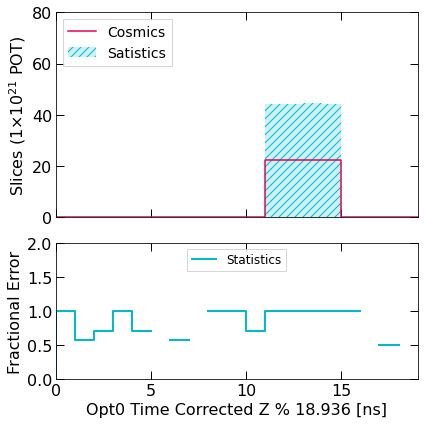

In [61]:
plot_combine_err(cos_dict, "cos", cos_label, cos_error_list, ifScale = True, scaleYmax = 10, suffix = '_scale')

<h1>Fuse Neutrino and Cosmics Into A Single Background</h1>

In [62]:
fill_nan_plz(cos_dict)
fill_nan_plz(nu_dict)

In [63]:
bkg_dict = {}

#combine cv
bkg_dict['cv_scale'] = cos_dict['cv_scale'] + nu_dict['cv_scale']
bkg_dict['cv_plot_scale'] = cos_dict['cv_plot_scale'] + nu_dict['cv_plot_scale']

#combine stat errors
bkg_dict['stat_cov_scale'] = cos_dict['stat_cov_scale'] + nu_dict['stat_cov_scale']

bkg_dict['stat_err_scale'] = np.sqrt(np.diag(bkg_dict['stat_cov_scale']))

bkg_dict['stat_cov_frac_scale'] = bkg_dict['stat_cov_scale'] / np.outer(bkg_dict['cv_scale'], bkg_dict['cv_scale'])
bkg_dict['stat_frac_err_scale'] = np.sqrt(np.diag(bkg_dict['stat_cov_frac_scale']))

#flux / xsec / g4 are taken directly from neutrino samples
bkg_dict['flx_frac_err_scale'] = nu_dict['flx_frac_err_scale']
bkg_dict['xsec_frac_err_scale'] = nu_dict['xsec_frac_err_scale']
bkg_dict['g4_frac_err_scale'] = nu_dict['g4_frac_err_scale']

bkg_dict['flx_cov_scale'] = nu_dict['flx_cov_scale']
bkg_dict['xsec_cov_scale'] = nu_dict['xsec_cov_scale']
bkg_dict['g4_cov_scale'] = nu_dict['g4_cov_scale']

#combine covariance matrix into one AFTER scaling
bkg_dict['combined_cov_scale'] = new_19_by_19_cov()

for err in nu_error_list:
    bkg_dict['combined_cov_scale'] = bkg_dict['combined_cov_scale'] + bkg_dict[err+'_cov_scale']

bkg_dict['combined_err_scale'] = np.sqrt(np.diag( bkg_dict['combined_cov_scale']))
    
bkg_dict['combined_cov_frac_scale'] = bkg_dict['combined_cov_scale'] / np.outer(bkg_dict['cv_scale'], bkg_dict['cv_scale'])
bkg_dict['combined_frac_err_scale'] = np.sqrt(np.diag(bkg_dict['combined_cov_frac_scale']))

In [64]:
bkg_dict['combined_frac_err_scale']

array([1.        , 1.37335387, 0.87016987, 0.81940745, 0.40522525,
       0.3358453 , 0.2736845 , 0.27971667, 0.28472027, 0.25656895,
       0.27943533, 0.28673315, 0.26672504, 0.34985546, 0.41676997,
       0.69773442, 0.85911637, 1.0149843 , 1.41007387])

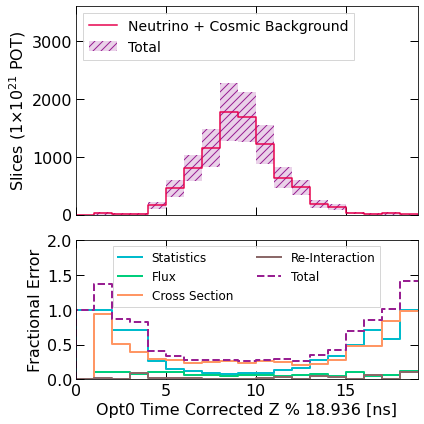

In [68]:
plot_combine_err(bkg_dict, "nu", "Neutrino + Cosmic Background"
                 , nu_error_list
                 , ifScale = True, scaleYmax = 1.2, suffix = '_scale')

In [ ]:
hnl_dict['m'] = 200
hnl_dict['fitU'] = 1e-7

In [ ]:
np.save("../pkl_files/v3_April2024/hnl_m"+str(m)+"_v3_weight.npy", hnl_dict) 
np.save("../pkl_files/v3_April2024/rock_m"+str(m)+"_v3_weight.npy", rockbox_dict)
np.save("../pkl_files/v3_April2024/ncpi0_m"+str(m)+"_v3_weight.npy", ncpi0_dict) 
np.save("../pkl_files/v3_April2024/nu_m"+str(m)+"_v3_weight.npy", nu_dict) 

###### 